# Used Car Sale Auction Prices
By Sky Reznik, John Lackey and Kevin Abatto

Import packages

In [1]:
# Install scikit-learn if not already installed
%pip install scikit-learn

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
import os
from kaggle.api.kaggle_api_extended import KaggleApi

Note: you may need to restart the kernel to use updated packages.


Download data using Kaggle KPI

In [2]:
# Specify the dataset and the path to save it
dataset_name = 'tunguz/used-car-auction-prices'  # Replace with your actual Kaggle dataset name
download_path = './kaggle_datasets'     # Folder to store the dataset

# Create download path if it doesn't exist
if not os.path.exists(download_path):
    os.makedirs(download_path)

# Check if file exists
dataset_file_path = os.path.join(download_path, 'car_prices.csv')   
# Check if the dataset already exists in the folder
if not os.path.exists(dataset_file_path):
    # Initialize the Kaggle API
    api = KaggleApi()
    api.authenticate()  # Authenticate using your Kaggle credentials

    # Download the dataset
    print(f"Downloading {dataset_name}...")
    api.dataset_download_files(dataset_name, path=download_path, unzip=True)

    print("Download complete.")
else:
    print("Dataset already exists, download skipped.")

# Load CSV into a pandas dataframe
shared_file_path = './kaggle_datasets/car_prices.csv'
# line 408,163 - "Model" field contains a comma (SE PZEV w/Connectivity, Navigation) - specify quotechar='"'
# This tells Pandas to treat anything inside double quotes as a single field, even if it contains commas.
#      solution provided by ChatGPT
df = pd.read_csv(shared_file_path, quotechar='"', on_bad_lines='skip')
df.head()

Dataset already exists, download skipped.


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Data Cleaning
__Done__
1) Remove any row with missing data with df.dropna()
2) One-Hot encode ['transmission'] to ['automatic_trans'] 0 /1 (double check unique vals)
3) One-Hot encode ['body'] (collapse all 85 body types)


__#TODO__

2) convert (or maybe drop) ['saledate']


In [3]:
print("Start: ", df.shape)

# 1 - Remove rows with missing values
df = df.dropna()

# 2 - One-hot encode the 'transmission' column
print(df['transmission'].unique())
df['auto_transmission'] = np.where(df['transmission'].str.contains('automatic', case=False), 1, 0)

# 3 - One-hot encode the 'body' column (count 85 unique values --> reduce to 8)
# ['suv' 'sedan' 'convertible' 'coupe' 'wagon' 'hatchback' 'truck' 'minivan' 'van']
print(df['body'].unique())
df['body_type'] = np.nan
df['body_type'] = np.where(df['body'].str.contains('minivan', case=False), 'minivan', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('sedan', case=False), 'sedan', df['body'])
df['body_type'] = np.where(df['body'].str.contains('wagon', case=False), 'wagon', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('coupe', case=False), 'coupe', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('koup', case=False), 'coupe', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('convertible', case=False), 'convertible', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('hatchback', case=False), 'hatchback', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains(r'\bvan\b', case=False), 'van', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('truck', case=False), 'truck', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('cab', case=False), 'truck', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('crew', case=False), 'truck', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('suv', case=False), 'suv', df['body_type'])
df['body_type'] = np.where(df['body'].str.contains('Minivan', case=False), 'minivan', df['body_type'])
print(df['body_type'].unique())

# Drop old columns
df.drop('transmission', axis=1, inplace=True)
df.drop('body', axis=1, inplace=True)
print("Finish: ", df.shape)


Start:  (558811, 16)
['automatic' 'manual']
['SUV' 'Sedan' 'Convertible' 'Coupe' 'Wagon' 'Hatchback' 'Crew Cab'
 'G Coupe' 'G Sedan' 'Elantra Coupe' 'Genesis Coupe' 'Minivan' 'Van'
 'Double Cab' 'CrewMax Cab' 'Access Cab' 'King Cab' 'CTS Coupe'
 'SuperCrew' 'E-Series Van' 'Extended Cab' 'SuperCab' 'G Convertible'
 'Koup' 'Regular Cab' 'Quad Cab' 'CTS-V Coupe' 'sedan' 'G37 Convertible'
 'Club Cab' 'Xtracab' 'Q60 Convertible' 'CTS Wagon' 'G37 Coupe' 'Mega Cab'
 'Cab Plus 4' 'Q60 Coupe' 'Beetle Convertible' 'TSX Sport Wagon'
 'Promaster Cargo Van' 'Cab Plus' 'GranTurismo Convertible' 'CTS-V Wagon'
 'Ram Van' 'convertible' 'minivan' 'Transit Van' 'van' 'regular-cab' 'suv'
 'g sedan' 'g coupe' 'hatchback' 'king cab' 'supercrew' 'g convertible'
 'coupe' 'crew cab' 'wagon' 'e-series van' 'regular cab' 'quad cab'
 'g37 convertible' 'supercab' 'extended cab' 'crewmax cab' 'double cab'
 'genesis coupe' 'access cab' 'mega cab' 'xtracab' 'beetle convertible'
 'cts coupe' 'koup' 'club cab' 'elantra

# Data Vizualization
Plot 'mmr' v. 'sellingprice'

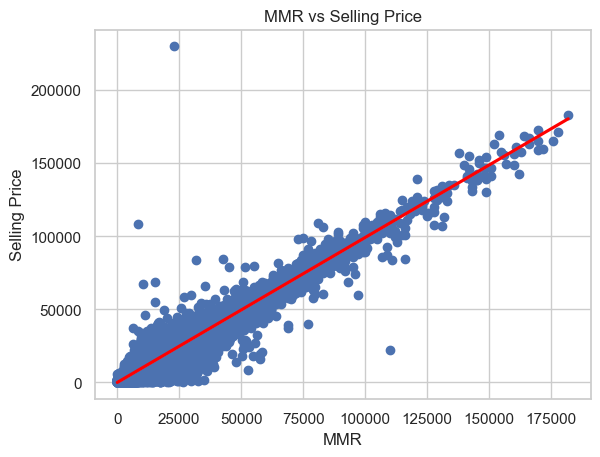

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of seaborn
sns.set(style="whitegrid")
plt.scatter(df['mmr'], df['sellingprice']) # Create a scatter plot
sns.regplot(x='mmr', y='sellingprice', data=df, scatter=False, color='red') # Linear fit line
plt.title('MMR vs Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()

# Scatterplot is showing some outlires, let's take a closer look at the data to find and remove them
1. Identify outliers

In [45]:
outliers_rows = df.index[
    ((df['mmr'] > 100000) | (df['sellingprice'] > 100000)) &
    ((df['mmr'] > df['sellingprice'] * 2) | (df['mmr'] < df['sellingprice'] * 0.5))
].tolist()

print("Outliers: ", outliers_rows)
df.loc[outliers_rows]

Outliers:  [160201, 344905, 405316]


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,body_type
160201,2010,Ford,Escape,XLT,SUV,automatic,1fmcu0d77aka54695,oh,3.7,82985.0,red,gray,pat obrien chevrolet south,8250,108200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),suv
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,22800,230000,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),suv
405316,2013,Mercedes-Benz,G-Class,G63 AMG,SUV,automatic,wdcyc7df0dx200577,pa,4.8,23947.0,black,black,adcock brothers inc,110000,22250,Fri Mar 20 2015 02:00:00 GMT-0700 (PDT),suv


Line 160201: